<a href="https://colab.research.google.com/github/vidyadhawal/Spam-Classifier/blob/master/Spam_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Importing essential liabaries

In [40]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log,sqrt
import pandas as pd
import numpy as np
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


We are going to make use of NLTK for processing the messages, WordCloud and matplotlib for visualization and pandas for loading data, NumPy for generating random probabilities for train-test split.

#2. Loading Data

In [0]:
from google.colab import files

In [7]:
uploaded=files.upload()

Saving spam_data.csv to spam_data.csv


In [19]:
mails=pd.read_csv("spam_data.csv",encoding='latin-1')
mails.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


We do not require the columns ‘Unnamed: 2’, ‘Unnamed: 3’ and ‘Unnamed: 4’, so  remove them.

In [0]:
mails.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)

In [12]:
mails.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


 rename the column ‘v1’ as ‘label’ and ‘v2’ as ‘message’.

In [0]:
mails.rename(columns={"v1":"label","v2":"message"},inplace=True)

In [22]:
mails.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [26]:
mails['label']=le.fit_transform(mails['label'])
mails.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


‘ham’ is replaced by 0 and ‘spam’ is replaced by 1 in the ‘label’ column

#**Visualizing data**

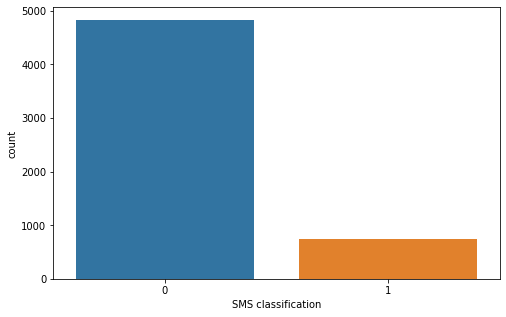

In [33]:
#visualizing the count of spam messages in dataset
import seaborn as sns
plt.figure(figsize=(8,5))
sns.countplot(x='label',data=mails)
plt.xlabel("SMS classification")
plt.ylabel("count")
plt.show()

Let us see which are the most repeated words in the spam messages! We are going to use WordCloud library for this purpose.

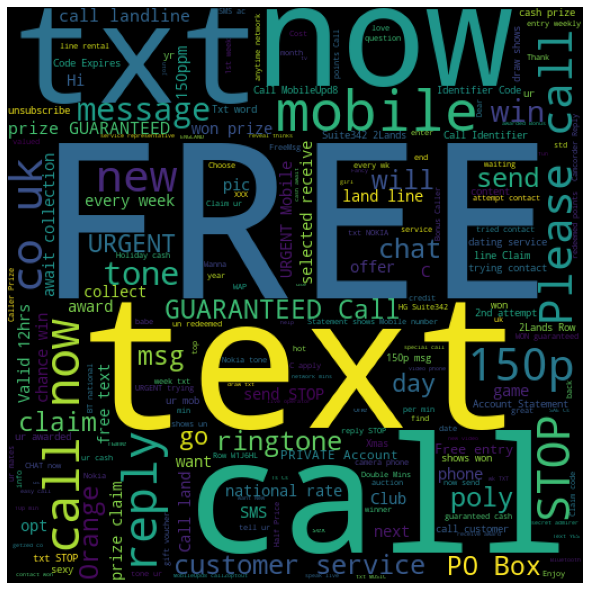

In [47]:
spam_words=' '.join(list(mails[mails['label']==1]['message']))
spam_wc=WordCloud(width=512,height=512).generate(spam_words)
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

these messages mostly contain the words like ‘FREE’, ‘call’, ‘text’, ‘ringtone’, ‘prize claim’ etc.

Similarly the wordcloud of ham messages is as follows:

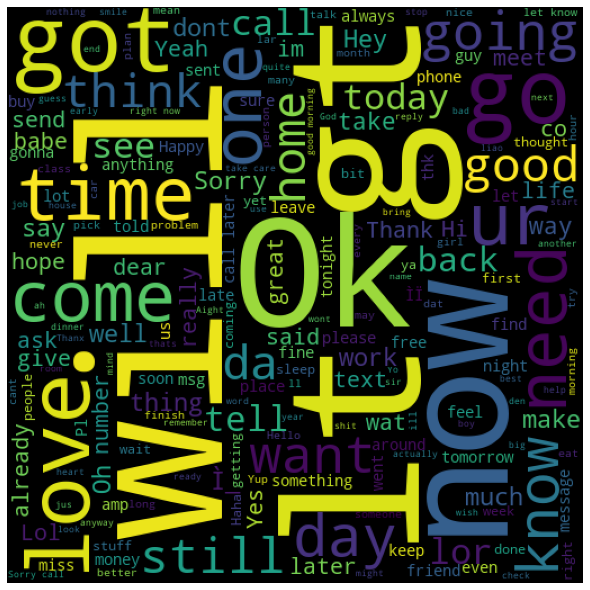

In [48]:
ham_words=' '.join(list(mails[mails['label']==0]['message']))
ham_wc=WordCloud(width=512,height=512).generate(ham_words)
plt.figure(figsize=(10,8))
plt.imshow(ham_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#**Data cleaning and prepocessing**

Preprocessing: 

Before starting with training we must preprocess the messages. First of all, we shall make all the character lowercase. This is because ‘free’ and ‘FREE’ mean the same and we do not want to treat them as two different words.

Then we tokenize each message in the dataset. Tokenization is the task of splitting up a message into pieces and throwing away the punctuation characters. For eg.:

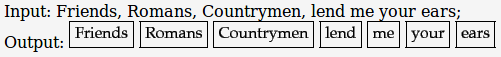

Stemming:

The words like ‘go’, ‘goes’, ‘going’ indicate the same activity. We can replace all these words by a single word ‘go’. This is called stemming. We are going to use Porter Stemmer, which is a famous stemming algorithm.

We then move on to remove the stop words. Stop words are those words which occur extremely frequently in any text. For example words like ‘the’, ‘a’, ‘an’, ‘is’, ‘to’ etc. These words do not give us any information about the content of the text. Thus it should not matter if we remove these words for the text.

In [0]:
#cleaning the message
import re

corpus=[]
ps=PorterStemmer()
for i in range(0,mails.shape[0]):

  #claeaning special character from message
  message=re.sub(pattern='[^a-zA-Z]',repl=' ',string=mails.message[i])

  #converting the entie message in lowercase
  message=message.lower()

  #Tokenizing the eview by word
  words=message.split()

  #Removing the stop words
  words=[word for word in words if word not in set(stopwords.words('english'))]

  #stemming the words
  words=[ps.stem(word) for word in words]

  #joining the stemmed words
  message=' '.join(words)

  #Building a corpus of message
  corpus.append(message)



In [42]:
corpus[0:10]

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free']

In [0]:

# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

In [0]:
# Extracting dependent variable from the dataset
y = mails['label']

#**Model Building**

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [55]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [57]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, y_pred)
score2 = precision_score(y_test, y_pred)
score3 = recall_score(y_test, y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 98.65%
Precision score is: 0.96
Recall score is: 0.95


In [0]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [59]:
cm

array([[943,   6],
       [  9, 157]])

Text(69.0, 0.5, 'Actual values')

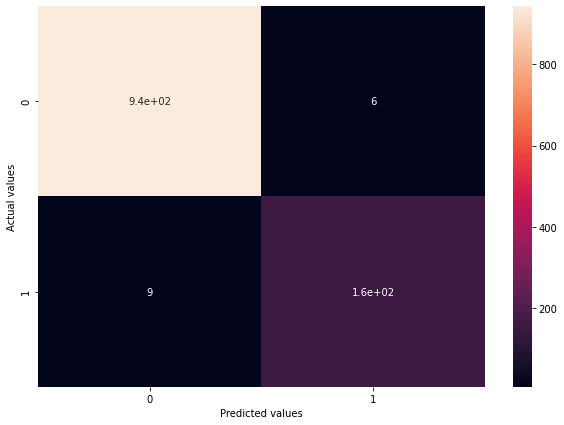

In [60]:

# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [61]:

# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.0,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Accuracy score for alpha=0.0 is: 97.58%
Accuracy score for alpha=0.1 is: 98.39%
Accuracy score for alpha=0.2 is: 98.48%
Accuracy score for alpha=0.3 is: 98.57%
Accuracy score for alpha=0.4 is: 98.57%
Accuracy score for alpha=0.5 is: 98.48%
Accuracy score for alpha=0.6 is: 98.57%
Accuracy score for alpha=0.7 is: 98.57%
Accuracy score for alpha=0.8 is: 98.65%
Accuracy score for alpha=0.9 is: 98.65%
Accuracy score for alpha=1.0 is: 98.65%
--------------------------------------------
The best accuracy is 98.65% with alpha value as 0.8


In [62]:
classifier = MultinomialNB(alpha=0.3)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.3, class_prior=None, fit_prior=True)

#**Predictions**

In [0]:
def predict_spam(sample_message):
  sample_message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_message)
  sample_message = sample_message.lower()
  sample_message_words = sample_message.split()
  sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_message = [ps.stem(word) for word in sample_message_words]
  final_message = ' '.join(final_message)

  temp = cv.transform([final_message]).toarray()
  return classifier.predict(temp)

In [64]:
# Predicting values
sample_message = 'I cant pick the phone right now. Pls send a message'

if predict_spam(sample_message):
  print('This is a SPAM message!')
else:
  print('This is a normal message.')

This is a normal message.


In [65]:
# Predicting values
sample_message = 'Congratulations ur awarded $500'

if predict_spam(sample_message):
  print('This is a SPAM message!')
else:
  print('This is a normal message.')

This is a SPAM message!


In [66]:
# Predicting values
sample_message = 'K tell me anything about you.'

if predict_spam(sample_message):
  print('This is a SPAM message!')
else:
  print('This is a normal message.')

This is a normal message.
